In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import preprocessing
%matplotlib inline


Matplotlib is building the font cache; this may take a moment.


In [13]:
plt.xkcd()

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ShaileshAdhikari/saviour-of-heart/main/dataset/dataset_savioroftheheart.csv')

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10115 entries, 0 to 10114
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sex                         10115 non-null  object 
 1   Age                         10115 non-null  int64  
 2   SBP(mmHg)                   10115 non-null  int64  
 3   Treatment for Hypertension  10115 non-null  object 
 4   Current Smoker              10115 non-null  object 
 5   Diabetes                    10115 non-null  object 
 6   HDL                         10115 non-null  int64  
 7   TCL                         10115 non-null  int64  
 8   Risk Score                  10115 non-null  float64
 9   Risk Score (%)              10115 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 790.4+ KB


No null entries.

In [6]:
df.describe()

,Age,SBP(mmHg),HDL,TCL,Risk Score,Risk Score (%)
count,10115.000000,10115.000000,10115.000000,10115.000000,10115.000000,10115.000000
mean,52.035195,144.325260,54.412358,252.418784,0.284577,28.457680
std,13.058460,32.808286,26.278161,88.201082,0.246664,24.666374
min,30.000000,22.000000,10.000000,100.000000,0.002894,0.289403
25%,41.000000,117.000000,32.000000,177.000000,0.089754,8.975380
50%,52.000000,144.000000,53.000000,250.000000,0.203342,20.334206
75%,63.000000,173.000000,77.000000,329.000000,0.410746,41.074556
max,74.000000,200.000000,100.000000,405.000000,0.999996,99.999595


In [7]:
def clean_dataset(dataf):
    df.rename(columns = {'SBP(mmHg)':'SBP', 'Treatment for Hypertension':'Hypertension', 'Current Smoker' : 'Smoker', 'Risk Score': 'Risk_Score', 'Risk Score (%)':'Percent_RS'}, inplace = True)
    return dataf

(df.pipe(clean_dataset))

,Sex,Age,SBP,Hypertension,Smoker,Diabetes,HDL,TCL,Risk_Score,Percent_RS
0,m,30,90,n,n,y,10,100,0.032416,3.241608
1,m,31,95,y,y,n,15,115,0.046323,4.632346
2,f,31,90,n,y,y,20,130,0.023048,2.304822
3,f,32,95,y,y,n,25,145,0.018608,1.860786
4,m,33,100,n,y,y,30,160,0.061379,6.137861
...,...,...,...,...,...,...,...,...,...,...
10110,f,59,184,n,y,y,15,372,0.962637,96.263738
10111,f,74,151,y,y,y,66,202,0.519867,51.986720
10112,f,39,188,y,y,y,34,166,0.320684,32.068406
10113,m,66,110,n,y,y,75,359,0.488608,48.860798


/tmp/ipykernel_7366/1874640268.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidth =2)


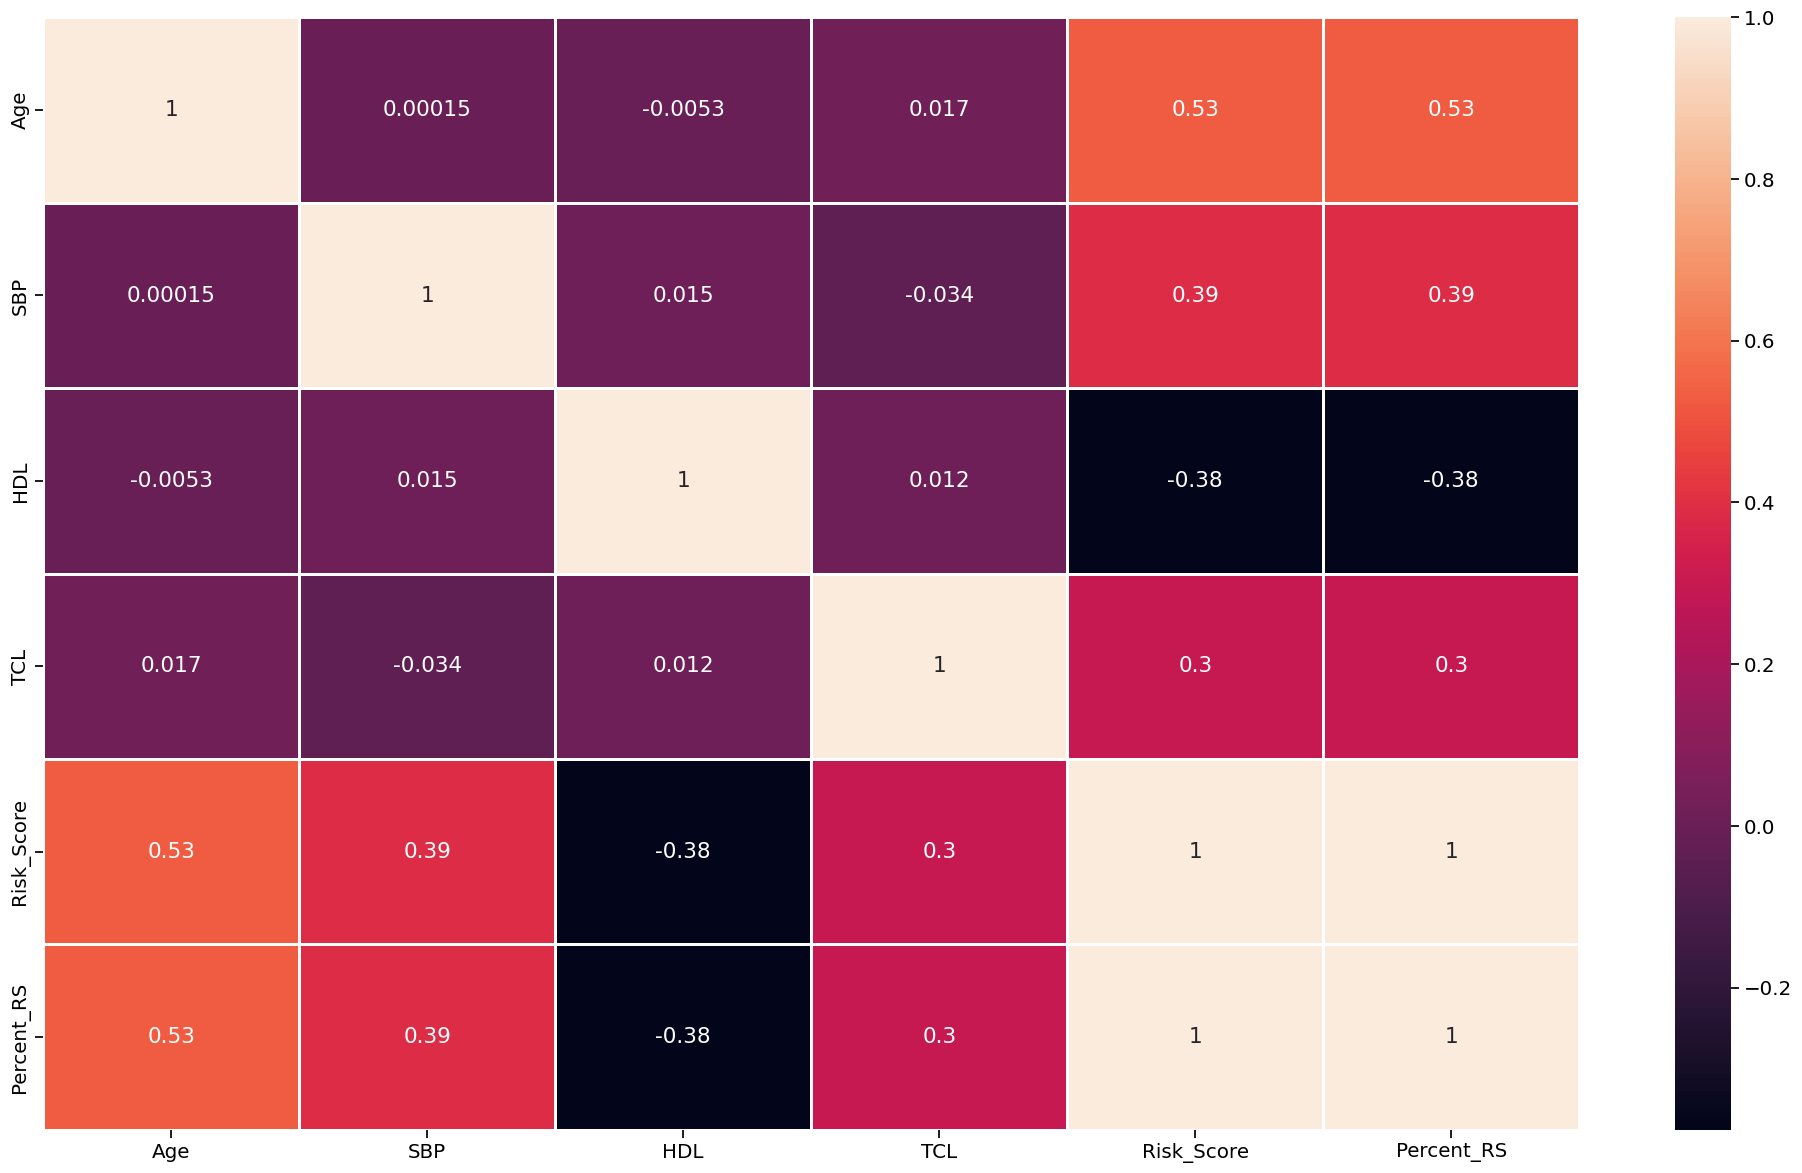

In [8]:
#Check Collinearity
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df.corr(),annot=True,linewidth =2)
plt.tight_layout()

Columns Risk_Score and Percent_RS are highly correlated and so one must be removed.

In [9]:
#Remove Percent_RS Column.
df.drop('Percent_RS', inplace=True, axis=1)

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

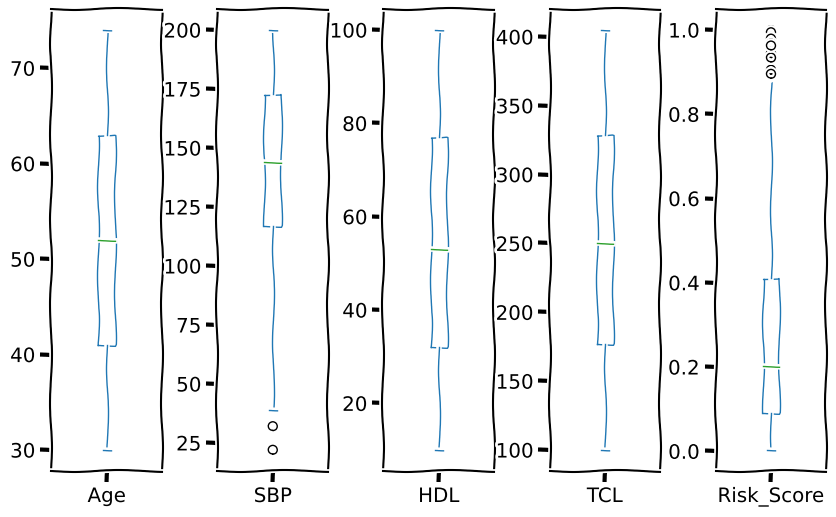

In [14]:
#Boxplot to check for outliers.
df.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

Outliers Present in SBP.

In [11]:
# Finding SBP outliers

def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers

outliers = find_outliers_IQR(df['SBP'])
print("number of outliers:" + str(len(outliers)))
outliers

number of outliers:4


63      22
75      32
7140    22
7152    32
Name: SBP, dtype: int64

In [194]:
#Dropping Outliers
df.drop([63, 75, 7140, 7152])

,Sex,Age,SBP,Hypertension,Smoker,Diabetes,HDL,TCL,Risk_Score
0,m,30,90,n,n,y,10,100,0.032416
1,m,31,95,y,y,n,15,115,0.046323
2,f,31,90,n,y,y,20,130,0.023048
3,f,32,95,y,y,n,25,145,0.018608
4,m,33,100,n,y,y,30,160,0.061379
...,...,...,...,...,...,...,...,...,...
10110,f,59,184,n,y,y,15,372,0.962637
10111,f,74,151,y,y,y,66,202,0.519867
10112,f,39,188,y,y,y,34,166,0.320684
10113,m,66,110,n,y,y,75,359,0.488608


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

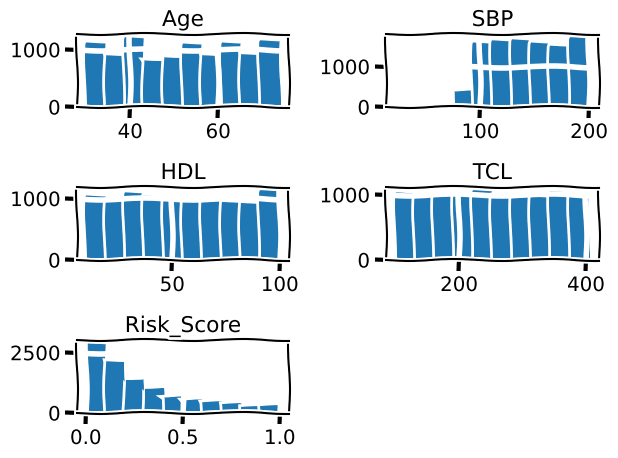

In [15]:
df.hist()
plt.tight_layout()

Plotting relationship of target variables with predictor variables.

<AxesSubplot: xlabel='HDL', ylabel='Risk_Score'>

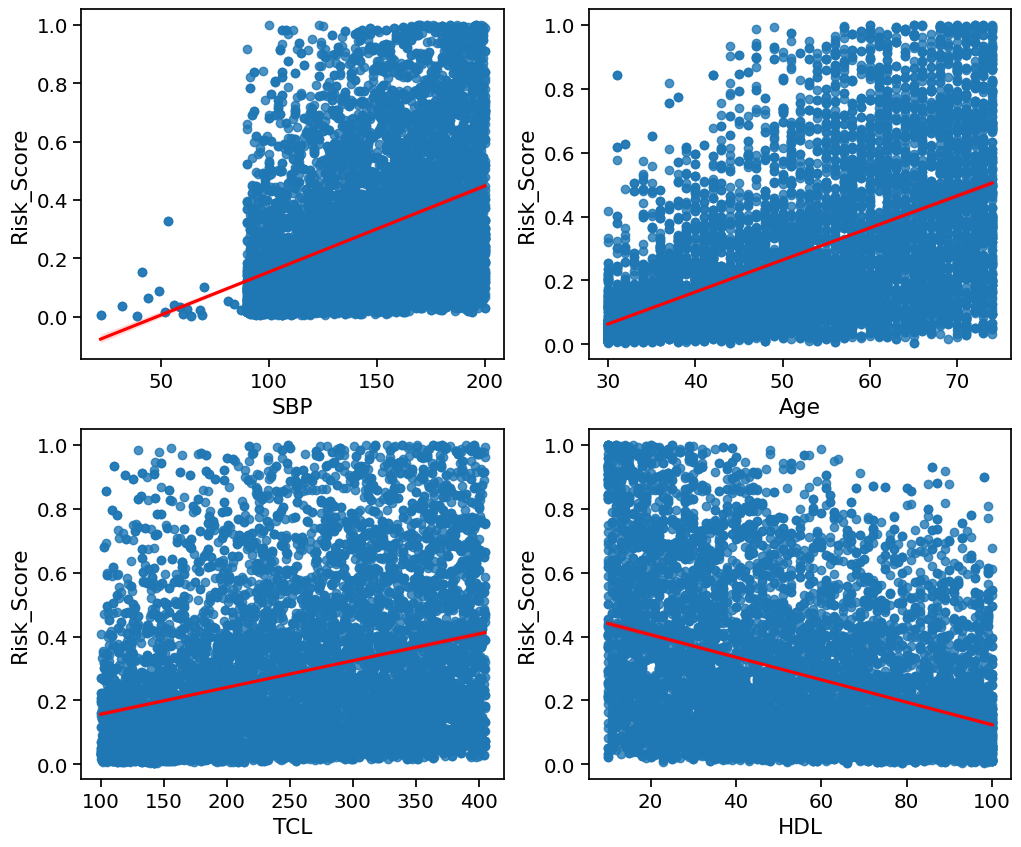

In [196]:
fig, axes=plt.subplots(2,2,figsize = (12,10))

sns.regplot(x='SBP',y='Risk_Score',data=df,line_kws={'color':'red'}, ax = axes[0,0])

sns.regplot(x='Age',y='Risk_Score',data=df,line_kws={'color':'red'}, ax = axes[0,1])

sns.regplot(x='TCL',y='Risk_Score',data=df,line_kws={'color':'red'}, ax = axes[1,0])

sns.regplot(x='HDL',y='Risk_Score',data=df,line_kws={'color':'red'}, ax = axes[1,1])

The following conclusions can be drawn from the plots:
a. Risk of heart disease is higher in people older people.
b. Risk of heart disease is higher in people with higher SBP and TCL values.
c. Risk of heart disease is higher in people with low HDL levels.

Plotting relationship of target variable with categorical variables. 

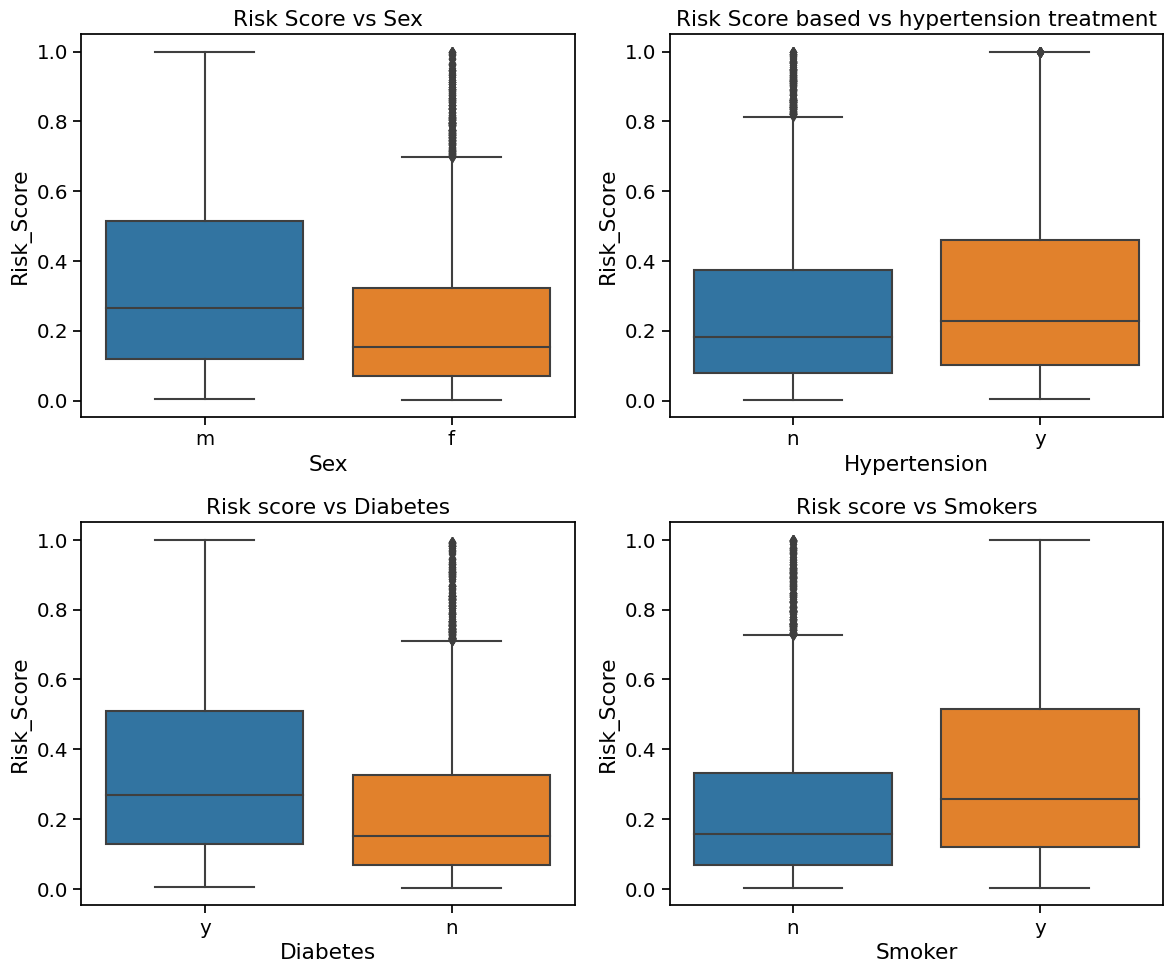

In [197]:
fig, axes=plt.subplots(2,2,figsize = (12,10))

sns.boxplot(x='Sex',y='Risk_Score',data=df,ax = axes[0,0])
axes[0,0].set_title('Risk Score vs Sex')

sns.boxplot(x='Hypertension',y='Risk_Score',data=df,ax=axes[0,1])
axes[0,1].set_title('Risk Score based vs hypertension treatment')

sns.boxplot(x='Diabetes',y='Risk_Score',data=df,ax=axes[1,0])
axes[1,0].set_title("Risk score vs Diabetes")

sns.boxplot(x='Smoker',y='Risk_Score',data=df,ax=axes[1,1])
axes[1,1].set_title("Risk score vs Smokers")

fig.tight_layout()

The following conclusions can be drawn from the plots:
a. Men are at a higher risk of heart disease than women.
b. Those taking hypertension treatments are more prone to heart disease than those who don't.
c. Diabetics are at a higher risk than non-diabetics.
d. Current smokers are more likely to get heart disease than non-smokers.

In [34]:
#Splitting test and train data.
x = df[['Age','Sex','SBP','Hypertension','Smoker','Diabetes','TCL','HDL']]
y = df['Risk_Score']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

### New learning for me too:
Why you shouldnt use label encoder to encode your dependent variables (x). 
https://stackoverflow.com/questions/61217713/labelencoder-for-categorical-features/61217936#61217936
Try one hot encoder or something else for that matter.

### Why scaling and encoding after the train test split?
https://datascience.stackexchange.com/questions/107714/encoding-before-vs-after-train-test-split#:~:text=If%20you%20perform%20the%20encoding,scores%20but%20poor%20in%20deployment).
fit function of the encoder calculates whatever value is requried to scale the values or encode the values and transform applies the calcualtions to your dataset. VERY IMPORTANT TO LEARN WHAT EACH FUNCTION DOES.


In [36]:
columns_to_encode = ['Sex', 'Hypertension', 'Smoker', 'Diabetes']

for col in columns_to_encode:
    labelencoder = LabelEncoder()
    x_train[col] = labelencoder.fit_transform(x_train[col])
    x_test[col] = labelencoder.transform(x_test[col])

print(x_train.head())
print(x_test.head())

      Age  Sex  SBP  Hypertension  Smoker  Diabetes  TCL  HDL
7841   48    0  101             1       1         1  162   59
8785   68    1  124             1       1         1  386   43
2388   42    0  140             0       1         1  257   12
1817   39    1  182             1       1         0  138   55
3125   40    1  110             0       0         0  365   67
      Age  Sex  SBP  Hypertension  Smoker  Diabetes  TCL  HDL
9419   37    1  198             0       0         1  309   47
1472   56    1  165             1       1         1  222   82
8366   53    1  170             0       1         0  293   53
9465   38    1  162             1       0         0  312   72
9389   73    0  114             1       0         1  144   63


In [42]:
scaler = StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)
print(scaler.mean_)

[ 22.00506673   0.50865052  73.7564261    0.50444884   0.49987642
   0.49233811 152.80066733  44.43215522]


In [44]:
model = LinearRegression()


In [45]:
model.fit(x_train,y_train)

LinearRegression()

In [46]:
predictions = model.predict(x_test)

In [47]:
print(
  'R2 Score : ', r2_score(y_test, predictions))
print(
  'Mean Absolute Error : ', mean_absolute_error(y_test, predictions))
print(
  'Mean Squared Error : ', mean_squared_error(y_test, predictions))

R2 Score :  0.8320402759331473
Mean Absolute Error :  0.0774797922986029
Mean Squared Error :  0.009589004971955738


In [48]:
predictions

array([ 0.39841538,  0.45746824,  0.43142295, ...,  0.15451271,
       -0.09088227,  0.22150531])